In [58]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf
data=yf.download("AAPL",start='2019-01-01',end='2023-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047050  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257275  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719696  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640202  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319599  164101200


In [59]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest= adfuller(dataset, autolag='AIC')
    print("ADF:",dftest[0])
    print("p-value:",dftest[1])
    print("Number of lags:",dftest[2])
    print("Number of observations:",dftest[3])


In [60]:
data['Close'] =np.log(data['Close'])
data['Close'] =np.log(data['Close'])
data['Close'] =np.log(data['Close'])
data['Close'] =np.log(data['Close'])
ad_test(data['Close'])

ADF: -3.031819422159775
p-value: 0.03202783263543172
Number of lags: 10
Number of observations: 997


In [71]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,-1.332851,38.047050,148158800
2019-01-03,35.994999,36.430000,35.500000,-1.422019,34.257275,365248800
2019-01-04,36.132500,37.137501,35.950001,-1.384979,35.719696,234428400
2019-01-07,37.174999,37.207500,36.474998,-1.386900,35.640202,219111200
2019-01-08,37.389999,37.955002,37.130001,-1.370800,36.319599,164101200


In [61]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [62]:
stepwise_fit = auto_arima(data['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-5788.970, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-6209.431, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-6550.208, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-6544.259, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-6589.181, Time=0.39 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-6559.946, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-6611.756, Time=0.66 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-6647.469, Time=0.69 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-6618.483, Time=0.64 sec
 ARIMA(0,2,5)(0,0,0)[0]             : AIC=-6621.804, Time=1.51 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=-6627.596, Time=0.68 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec

Best model:  ARIMA(0,2,4)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:               SARIMAX(0, 2, 4)   Log Likelihood                3328.734
Date:                Thu, 23 Mar 2023   AIC                          -6647.469
Time:                        22:05:43   BIC                          -6622.900
Sample:                             0   HQIC                         -6638.134
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2070      0.017    -69.824      0.000      -1.241      -1.173
ma.L2          0.2608      0.023     11.110      0.000       0.215       0.307
ma.L3         -0.0547      0.024     -2.294      0.022      -0.101      -0.008
ma.L4          0.0115      0.020      0.581      0.561      -0.027       0.050
sigma2      7.795e-05    1.6e-06     48.757      0.000    7.48e-05    8.11e-05
===================================================================================
Ljung-Box (L1) (Q):                   7.12   Jarque-Bera (JB):              6987.62
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
train=data.iloc[:-30]
test=data.iloc[-30:]

In [67]:
model=ARIMA(train['Close'],order=(0,2,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  978
Model:                 ARIMA(0, 2, 4)   Log Likelihood                3219.157
Date:                Thu, 23 Mar 2023   AIC                          -6428.314
Time:                        22:11:37   BIC                          -6403.896
Sample:                             0   HQIC                         -6419.022
                                - 978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1872      0.018    -67.070      0.000      -1.222      -1.152
ma.L2          0.2476      0.023     10.855      0.000       0.203       0.292
ma.L3         -0.0855      0.024     -3.513      0.000      -0.133      -0.038
ma.L4          0.0402      0.021      1.942      0.052      -0.000       0.081
sigma2      7.961e-05   1.66e-06     47.858      0.000    7.64e-05    8.29e-05
===================================================================================
Ljung-Box (L1) (Q):                   4.37   Jarque-Bera (JB):              7069.31
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ="levels")



978    -0.741533
979    -0.741747
980    -0.741744
981    -0.741782
982    -0.741821
983    -0.741859
984    -0.741897
985    -0.741935
986    -0.741974
987    -0.742012
988    -0.742050
989    -0.742089
990    -0.742127
991    -0.742165
992    -0.742203
993    -0.742242
994    -0.742280
995    -0.742318
996    -0.742356
997    -0.742395
998    -0.742433
999    -0.742471
1000   -0.742510
1001   -0.742548
1002   -0.742586
1003   -0.742624
1004   -0.742663
1005   -0.742701
1006   -0.742739
1007   -0.742778
Name: predicted_mean, dtype: float64


In [69]:
pred=np.exp(pred)
pred=np.exp(pred)
pred=np.exp(pred)
pred=np.exp(pred)


978     149.009477
979     148.887395
980     148.888995
981     148.867128
982     148.845267
983     148.823411
984     148.801559
985     148.779713
986     148.757872
987     148.736036
988     148.714205
989     148.692379
990     148.670559
991     148.648743
992     148.626932
993     148.605127
994     148.583326
995     148.561531
996     148.539741
997     148.517955
998     148.496175
999     148.474400
1000    148.452630
1001    148.430865
1002    148.409105
1003    148.387350
1004    148.365600
1005    148.343855
1006    148.322116
1007    148.300381
Name: predicted_mean, dtype: float64


In [74]:
data['Close'] =np.exp(data['Close'])
data['Close'] =np.exp(data['Close'])
data['Close'] =np.exp(data['Close'])
data['Close'] =np.exp(data['Close'])

In [72]:
pred.index=data.index[start:end+1]
print(pred)

Date
2022-11-17    149.009477
2022-11-18    148.887395
2022-11-21    148.888995
2022-11-22    148.867128
2022-11-23    148.845267
2022-11-25    148.823411
2022-11-28    148.801559
2022-11-29    148.779713
2022-11-30    148.757872
2022-12-01    148.736036
2022-12-02    148.714205
2022-12-05    148.692379
2022-12-06    148.670559
2022-12-07    148.648743
2022-12-08    148.626932
2022-12-09    148.605127
2022-12-12    148.583326
2022-12-13    148.561531
2022-12-14    148.539741
2022-12-15    148.517955
2022-12-16    148.496175
2022-12-19    148.474400
2022-12-20    148.452630
2022-12-21    148.430865
2022-12-22    148.409105
2022-12-23    148.387350
2022-12-27    148.365600
2022-12-28    148.343855
2022-12-29    148.322116
2022-12-30    148.300381
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

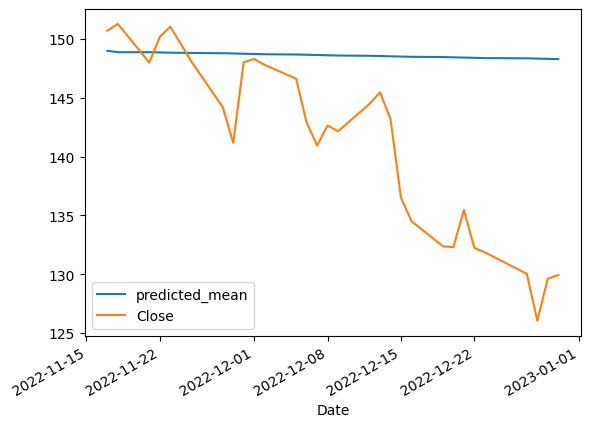

In [77]:
pred.plot(legend=True)
test['Close'].plot(legend=True)